In [52]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='bc2c8195-eb97-46da-8ab0-8213197795b6', project_access_token='p-b1ca1666f11c1a363db5bdefd0318b612badfeb7')
pc = project.project_context


# MARATONA BEHIND THE CODE 2020

## DESAFIO 6 - LIT

<hr>

## Installing Libs

In [1]:
!pip install scikit-learn --upgrade

     |████████████████████████████████| 6.8MB 6.1MB/s eta 0:00:01
     |████████████████████████████████| 307kB 17.0MB/s eta 0:00:01
ERROR: autoai-libs 1.10.5 has requirement numpy>=1.16.4, but you'll have numpy 1.15.4 which is incompatible.
ERROR: autoai-libs 1.10.5 has requirement pandas>=0.24.2, but you'll have pandas 0.24.1 which is incompatible.
ERROR: autoai-libs 1.10.5 has requirement scikit-learn==0.20.3, but you'll have scikit-learn 0.23.2 which is incompatible.
  Found existing installation: scikit-learn 0.20.3
    Uninstalling scikit-learn-0.20.3:
      Successfully uninstalled scikit-learn-0.20.3


In [2]:
!pip install imbalanced-learn --upgrade

     |████████████████████████████████| 174kB 6.7MB/s eta 0:00:01


In [3]:
!pip install xgboost --upgrade

     |████████████████████████████████| 148.9MB 90kB/s s eta 0:00:01▏                             | 9.9MB 4.9MB/s eta 0:00:29     |██████████████████▉             | 87.8MB 22.1MB/s eta 0:00:03��        | 109.2MB 24.0MB/s eta 0:00:02�███████████▉       | 115.4MB 24.0MB/s eta 0:00:02     |████████████████████████████▍   | 132.1MB 23.2MB/s eta 0:00:01�██████████████████████▏  | 135.6MB 23.2MB/s eta 0:00:01     |██████████████████████████████▏ | 140.5MB 23.2MB/s eta 0:00:01�██▊| 147.5MB 23.2MB/s eta 0:00:01


In [21]:
!pip install imblearn --upgrade

  ERROR: Could not find a version that satisfies the requirement imblearn==0.9 (from versions: 0.0)
ERROR: No matching distribution found for imblearn==0.9


<hr>

## Download dos conjuntos de dados em formato .csv

In [53]:
import pandas as pd

In [6]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset-3/master/training_dataset.csv

--2020-08-31 02:36:40--  https://raw.githubusercontent.com/vanderlei-test/dataset-3/master/training_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.8.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.8.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1736600 (1.7M) [text/plain]
Saving to: ‘training_dataset.csv’

100%[======================================>] 1,736,600   --.-K/s   in 0.09s   

2020-08-31 02:36:41 (18.9 MB/s) - ‘training_dataset.csv’ saved [1736600/1736600]



In [54]:
df_training_dataset = pd.read_csv('training_dataset.csv')
df_training_dataset.tail()

,id,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados,categoria
15852,620397030.0,Bacharelado,UFF,Outros,Borracha,0.0,0.0,1.0,8.0,NaN,10.0,NaN,NaN,NaN,perfil6
15853,229931283.0,Bacharelado,NaN,Advogado,NaN,0.0,0.0,1.0,7.0,Linkedin,42.0,17.0,15.0,NaN,perfil5
15854,480674907.0,Tecnólogo,UNIP,Sócio/Dono/Proprietário,NaN,0.0,NaN,1.0,7.0,Outros,30.0,9.0,8.0,0.0,perfil5
15855,559626807.0,SEM FORMAÇÃO,UNIVERSIDADE NOVE DE JULHO,Advogado,Estado,0.0,0.0,1.0,10.0,NaN,226.0,102.0,93.0,1.0,perfil1
15856,743652801.0,NaN,FGV-RJ,NaN,Siderurgica,1.0,1.0,1.0,9.0,Outros,125.0,98.0,97.0,1.0,perfil1


In [3]:
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15857 entries, 0 to 15856
Data columns (total 15 columns):
id                            13945 non-null float64
graduacao                     13950 non-null object
universidade                  13920 non-null object
profissao                     13977 non-null object
organizacao                   13961 non-null object
pretende_fazer_cursos_lit     13989 non-null float64
interesse_mba_lit             14003 non-null float64
importante_ter_certificado    13918 non-null float64
horas_semanais_estudo         13959 non-null float64
como_conheceu_lit             13915 non-null object
total_modulos                 13987 non-null float64
modulos_iniciados             14044 non-null float64
modulos_finalizados           13924 non-null float64
certificados                  13979 non-null float64
categoria                     15857 non-null object
dtypes: float64(9), object(6)
memory usage: 1.8+ MB


In [4]:
df_training_dataset.nunique()

id                            13945
graduacao                         6
universidade                     21
profissao                        12
organizacao                      11
pretende_fazer_cursos_lit         2
interesse_mba_lit                 2
importante_ter_certificado        1
horas_semanais_estudo             9
como_conheceu_lit                 9
total_modulos                   578
modulos_iniciados               372
modulos_finalizados             339
certificados                     23
categoria                         6
dtype: int64

<hr>

Remove colunas

In [55]:
df_training_dataset = df_training_dataset.drop(columns=['id', 'total_modulos'], inplace=False)

In [ ]:
#df_training_dataset = df_training_dataset.dropna(axis='index', how='any', subset=['horas_semanais_estudo'])

<hr>

In [ ]:
Remove linhas que contém valores nulos

In [56]:
import numpy as np 

df_training_dataset['profissao'] = df_training_dataset['profissao'].replace(np.nan, 'Outros')
df_training_dataset['universidade'] = df_training_dataset['universidade'].replace(np.nan, 'Outros')
df_training_dataset['graduacao'] = df_training_dataset['graduacao'].replace(np.nan, 'Outros')
df_training_dataset['organizacao'] = df_training_dataset['organizacao'].replace(np.nan, 'Outros')
df_training_dataset['como_conheceu_lit'] = df_training_dataset['como_conheceu_lit'].replace(np.nan, 'Outros')

df_training_dataset['horas_semanais_estudo'] = df_training_dataset['horas_semanais_estudo'].fillna(0)
df_training_dataset['pretende_fazer_cursos_lit'] = df_training_dataset['pretende_fazer_cursos_lit'].fillna(0)
df_training_dataset['interesse_mba_lit'] = df_training_dataset['interesse_mba_lit'].fillna(0)
df_training_dataset['importante_ter_certificado'] = df_training_dataset['importante_ter_certificado'].fillna(0)
df_training_dataset['certificados'] = df_training_dataset['certificados'].fillna(0)
df_training_dataset['modulos_finalizados'] = df_training_dataset['modulos_finalizados'].fillna(0)
df_training_dataset['modulos_iniciados'] = df_training_dataset['modulos_iniciados'].fillna(0)

<hr>

In [57]:
df_training_dataset.tail()

,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,modulos_iniciados,modulos_finalizados,certificados,categoria
15852,Bacharelado,UFF,Outros,Borracha,0.0,0.0,1.0,8.0,Outros,0.0,0.0,0.0,perfil6
15853,Bacharelado,Outros,Advogado,Outros,0.0,0.0,1.0,7.0,Linkedin,17.0,15.0,0.0,perfil5
15854,Tecnólogo,UNIP,Sócio/Dono/Proprietário,Outros,0.0,0.0,1.0,7.0,Outros,9.0,8.0,0.0,perfil5
15855,SEM FORMAÇÃO,UNIVERSIDADE NOVE DE JULHO,Advogado,Estado,0.0,0.0,1.0,10.0,Outros,102.0,93.0,1.0,perfil1
15856,Outros,FGV-RJ,Outros,Siderurgica,1.0,1.0,1.0,9.0,Outros,98.0,97.0,1.0,perfil1


In [58]:
# Exibindo os dados ausentes do conjunto de dados após a primeira transformação (df)
print("Valores nulos no df_training_dataset após a transformação DropNA: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

Valores nulos no df_training_dataset após a transformação DropNA: 

graduacao                     0
universidade                  0
profissao                     0
organizacao                   0
pretende_fazer_cursos_lit     0
interesse_mba_lit             0
importante_ter_certificado    0
horas_semanais_estudo         0
como_conheceu_lit             0
modulos_iniciados             0
modulos_finalizados           0
certificados                  0
categoria                     0
dtype: int64



Transformando variáveis categóricas

In [30]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df_training = df_training_dataset
for var in df_training.columns[:-1]:
  if df_training[var].dtype == 'object':
    df_training[var] = labelencoder.fit_transform(df_training[var])
df_training.tail()


,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,modulos_iniciados,modulos_finalizados,certificados,categoria
15852,0,8,8,0,0.0,0.0,1.0,8.0,6,0.0,0.0,0.0,perfil6
15853,0,6,0,8,0.0,0.0,1.0,7.0,3,17.0,15.0,0.0,perfil5
15854,6,14,11,8,0.0,0.0,1.0,7.0,6,9.0,8.0,0.0,perfil5
15855,5,17,0,4,0.0,0.0,1.0,10.0,6,102.0,93.0,1.0,perfil1
15856,4,4,8,9,1.0,1.0,1.0,9.0,6,98.0,97.0,1.0,perfil1


<br>

Treinando um classificador

In [59]:
df_training.columns

Index(['graduacao', 'universidade', 'profissao', 'organizacao',
       'pretende_fazer_cursos_lit', 'interesse_mba_lit',
       'importante_ter_certificado', 'horas_semanais_estudo',
       'como_conheceu_lit', 'modulos_iniciados', 'modulos_finalizados',
       'certificados', 'categoria'],
      dtype='object')

In [60]:
features = df_training[
    [
        'graduacao', 'universidade', 'profissao', 'organizacao',
       'pretende_fazer_cursos_lit', 'interesse_mba_lit',
       'importante_ter_certificado', 'horas_semanais_estudo',
       'como_conheceu_lit', 'modulos_iniciados', 'modulos_finalizados',
       'certificados'
    ]
]
target = df_training['categoria']  ## NÃO TROQUE O NOME DA VARIÁVEL TARGET.


In [61]:
X = features #df_training.drop("categoria", axis = 1)
y = target #df_training.categoria

In [62]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

smt = SMOTE('all', random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=133)

X, y = smt.fit_sample(X_train, y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/imblearn/utils/_validation.py:638: FutureWarning: Pass sampling_strategy=all as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


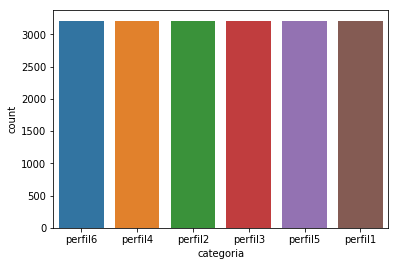

In [63]:
import seaborn as sns

ax = sns.countplot(x=y)

Treinando com o classificador extra tree

In [64]:
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

dtc = XGBClassifier(
 base_score=0.5,
 booster='gbtree',
 colsample_bylevel=1,
 colsample_bynode=1,
 colsample_bytree=1,
 gamma=0,
 learning_rate=0.2,
 max_delta_step=0,
 max_depth=3,
 max_features='sqrt',
 min_child_weight=1,
 min_samples_split=2,
 missing=None,
 n_estimators=50,
 n_jobs=1,
 nthread=None,
 objective='multi:softprob',
 random_state=0,
 reg_alpha=0,
 reg_lambda=1,
 scale_pos_weight=1,
 seed=None,
 silent=None,
 subsample=1,
 verbosity=1
)

dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

print("Acurácia: {}%".format(100*round(accuracy_score(y_test, y_pred), 4)))



[04:52:09] WARNING: ../src/learner.cc:516: 
Parameters: { max_features, min_samples_split, scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Acurácia: 80.96%


<hr>

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

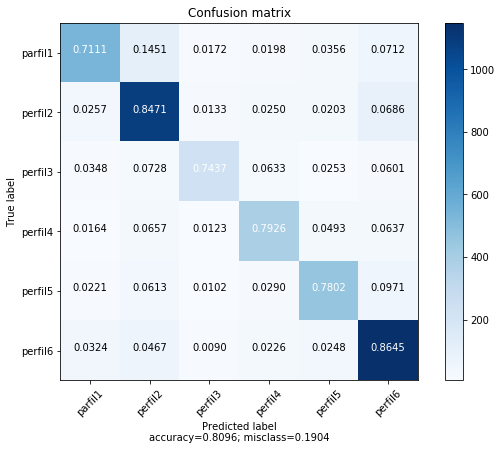

In [66]:
from sklearn.metrics import confusion_matrix

plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['parfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5', 'perfil6'])

<hr>

## Scoring dos dados necessários para entregar a solução

Como entrega da sua solução, esperamos os resultados classificados no seguinte dataset chamado "to_be_scored.csv":

### Download da "folha de respostas"

In [58]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset-3/master/to_be_scored.csv


--2020-08-31 04:20:08--  https://raw.githubusercontent.com/vanderlei-test/dataset-3/master/to_be_scored.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.8.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.8.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96291 (94K) [text/plain]
Saving to: ‘to_be_scored.csv.1’

100%[======================================>] 96,291      --.-K/s   in 0.02s   

2020-08-31 04:20:08 (4.78 MB/s) - ‘to_be_scored.csv.1’ saved [96291/96291]



In [67]:
df_to_be_scored = pd.read_csv('to_be_scored.csv')
df_to_be_scored.tail()

,id,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados
995,741745189,SEM FORMAÇÃO,UNIVERSIDADE NOVE DE JULHO,Coordenador,Borracha,0,0,1,2,YouTube,245,63,45,1
996,996387882,Bacharelado,UFRN,Assessor,Estado,1,1,1,8,Google,163,111,96,0
997,668869418,Bacharelado,UFSCar,Gerente,Siderurgica,1,1,1,9,Facebook,56,10,4,0
998,676531718,Tecnólogo,FATEC,Outros,servicos,1,1,1,9,Mídia (revista/jornal/web),138,60,30,0
999,388402340,Especialização,UNIP,Advogado,Montadora,0,0,1,9,Mídia (revista/jornal/web),22,20,19,0


# Atenção!

O dataframe ``to_be_scored`` é a sua "folha de respostas". Note que a coluna "categoria" não existe nessa amostra, que não pode ser então utilizada para treino de modelos de aprendizado supervisionado.

In [68]:
df_to_be_scored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
id                            1000 non-null int64
graduacao                     1000 non-null object
universidade                  1000 non-null object
profissao                     1000 non-null object
organizacao                   1000 non-null object
pretende_fazer_cursos_lit     1000 non-null int64
interesse_mba_lit             1000 non-null int64
importante_ter_certificado    1000 non-null int64
horas_semanais_estudo         1000 non-null int64
como_conheceu_lit             1000 non-null object
total_modulos                 1000 non-null int64
modulos_iniciados             1000 non-null int64
modulos_finalizados           1000 non-null int64
certificados                  1000 non-null int64
dtypes: int64(9), object(5)
memory usage: 109.5+ KB


<hr>

# Atenção!

# Para poder aplicar seu modelo e classificar a folha de respostas, você precisa primeiro aplicar as mesmas transformações com colunas que você aplicou no dataset de treino.

# Não remova ou adicione linhas na folha de respostas. 

# Não altere a ordem das linhas na folha de respostas.

# Ao final, as 1000 entradas devem estar classificadas, com os valores previstos em uma coluna chamada "target"

<hr>

Na célula abaixo, repetimos rapidamente os mesmos passos de pré-processamento usados no exemplo dado com árvore de decisão

In [69]:
df_to_be_scored_1 = df_to_be_scored.drop(columns=['id', 'total_modulos'], inplace=False)

df_to_be_scored_1['profissao'] = df_to_be_scored_1['profissao'].replace(np.nan, 'Outros')
df_to_be_scored_1['universidade'] = df_to_be_scored_1['universidade'].replace(np.nan, 'Outros')
df_to_be_scored_1['graduacao'] = df_to_be_scored_1['graduacao'].replace(np.nan, 'Outros')
df_to_be_scored_1['organizacao'] = df_to_be_scored_1['organizacao'].replace(np.nan, 'Outros')
df_to_be_scored_1['como_conheceu_lit'] = df_to_be_scored_1['como_conheceu_lit'].replace(np.nan, 'Outros')

df_to_be_scored_1['horas_semanais_estudo'] = df_to_be_scored_1['horas_semanais_estudo'].fillna(0)
df_to_be_scored_1['pretende_fazer_cursos_lit'] = df_to_be_scored_1['pretende_fazer_cursos_lit'].fillna(0)
df_to_be_scored_1['interesse_mba_lit'] = df_to_be_scored_1['interesse_mba_lit'].fillna(0)
df_to_be_scored_1['importante_ter_certificado'] = df_to_be_scored_1['importante_ter_certificado'].fillna(0)
df_to_be_scored_1['certificados'] = df_to_be_scored_1['certificados'].fillna(0)
df_to_be_scored_1['modulos_finalizados'] = df_to_be_scored_1['modulos_finalizados'].fillna(0)
df_to_be_scored_1['modulos_iniciados'] = df_to_be_scored_1['modulos_iniciados'].fillna(0)


labelencoder = LabelEncoder()
df_to_be_scored_2 = df_to_be_scored_1
for var in df_to_be_scored_2.columns[:-1]:
  if df_to_be_scored_2[var].dtype == 'object':
    df_to_be_scored_2[var] = labelencoder.fit_transform(df_to_be_scored_2[var])
df_to_be_scored_2.tail()





,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,modulos_iniciados,modulos_finalizados,certificados
995,4,16,4,0,0,0,1,2,8,63,45,1
996,0,10,3,4,1,1,1,8,1,111,96,0
997,0,11,7,8,1,1,1,9,0,10,4,0
998,5,3,8,10,1,1,1,9,5,60,30,0
999,1,13,0,6,0,0,1,9,5,20,19,0


<hr>

Pode ser verificado abaixo que as colunas da folha de resposta agora são idênticas às que foram usadas para treinar o modelo:

In [70]:
df_training[
    [
        'graduacao', 'universidade', 'profissao', 'organizacao',
       'pretende_fazer_cursos_lit', 'interesse_mba_lit',
       'importante_ter_certificado', 'horas_semanais_estudo',
       'como_conheceu_lit', 'modulos_iniciados', 'modulos_finalizados',
       'certificados'
    ]
].columns



Index(['graduacao', 'universidade', 'profissao', 'organizacao',
       'pretende_fazer_cursos_lit', 'interesse_mba_lit',
       'importante_ter_certificado', 'horas_semanais_estudo',
       'como_conheceu_lit', 'modulos_iniciados', 'modulos_finalizados',
       'certificados'],
      dtype='object')

In [71]:
df_to_be_scored_2.columns

Index(['graduacao', 'universidade', 'profissao', 'organizacao',
       'pretende_fazer_cursos_lit', 'interesse_mba_lit',
       'importante_ter_certificado', 'horas_semanais_estudo',
       'como_conheceu_lit', 'modulos_iniciados', 'modulos_finalizados',
       'certificados'],
      dtype='object')

In [72]:
df_to_be_scored_2.tail()

,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,modulos_iniciados,modulos_finalizados,certificados
995,4,16,4,0,0,0,1,2,8,63,45,1
996,0,10,3,4,1,1,1,8,1,111,96,0
997,0,11,7,8,1,1,1,9,0,10,4,0
998,5,3,8,10,1,1,1,9,5,60,30,0
999,1,13,0,6,0,0,1,9,5,20,19,0


# Atenção

Para todas colunas que não existirem no "df_to_be_scored", você pode usar a técnica abaixo para adicioná-las:

In [73]:
y_pred = dtc.predict(df_to_be_scored_2)
df_to_be_scored_2['target'] = y_pred
df_to_be_scored_2.tail()

,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,modulos_iniciados,modulos_finalizados,certificados,target
995,4,16,4,0,0,0,1,2,8,63,45,1,perfil1
996,0,10,3,4,1,1,1,8,1,111,96,0,perfil2
997,0,11,7,8,1,1,1,9,0,10,4,0,perfil6
998,5,3,8,10,1,1,1,9,5,60,30,0,perfil2
999,1,13,0,6,0,0,1,9,5,20,19,0,perfil3


### Salvando a folha de respostas como um arquivo .csv para ser submetido

In [74]:
project.save_data(file_name="results.csv", data=df_to_be_scored_2.to_csv(index=False))

{'file_name': 'results.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'desafio6-donotdelete-pr-rue6whvk1iprqt',
 'asset_id': 'b420ebca-48d8-4d8e-8d12-660ce99823f4'}

# Atenção

# A execução da célula acima irá criar um novo "data asset" no seu projeto no Watson Studio. Você precisará realizar o download deste arquivo juntamente com este notebook e criar um arquivo zip com os arquivos **results.csv** e **notebook.ipynb** para submissão. (os arquivos devem estar nomeados desta forma)

<hr>

## Parabéns!

Se você já está satisfeito com a sua solução, vá até a página abaixo e envie os arquivos necessários para submissão.

# https://lit.maratona.dev
